# **All Trump's Twitter Insults**

* **beginner**
* **eda**
* **dataviz**
* **nlp**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# **Exploratory Data Analysis**

In [2]:
df = pd.read_csv('/kaggle/input/all-trumps-twitter-insults-20152021/trump_insult_tweets_2014_to_2021.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10360 non-null  int64 
 1   date        10360 non-null  object
 2   target      10358 non-null  object
 3   insult      10360 non-null  object
 4   tweet       10360 non-null  object
dtypes: int64(1), object(4)
memory usage: 404.8+ KB


In [4]:
df.head(2)

,Unnamed: 0,date,target,insult,tweet
0,1,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."


In [5]:
# dropping Unnamed: 0 column
df = df.drop(df.columns[0], axis=1)
df.head(2)

,date,target,insult,tweet
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ..."
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ..."


In [6]:
# Find NA values
df.isna().sum()

date      0
target    2
insult    0
tweet     0
dtype: int64

In [7]:
# fill NA values 
df.target = df.target.fillna('unknown')
df.isna().sum()

date      0
target    0
insult    0
tweet     0
dtype: int64

In [8]:
# create column datetime.year value
df['year'] = pd.DatetimeIndex(df['date']).year

In [9]:
df.head(2)

,date,target,insult,tweet,year
0,2014-10-09,thomas-frieden,fool,"Can you believe this fool, Dr. Thomas Frieden ...",2014
1,2014-10-09,thomas-frieden,DOPE,"Can you believe this fool, Dr. Thomas Frieden ...",2014


# **Data Visualization - EDA**

In [10]:
# Importing pygal and its styles
!pip install pygal -q
import pygal
from pygal.style import Style
from IPython.display import display, HTML

In [11]:
base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""
def pygalplot(chart):
    rendered_chart = chart.render(is_unicode=True)
    plot_html = base_html.format(rendered_chart=rendered_chart)
    display(HTML(plot_html))

In [12]:
year = df.groupby('year')['year'].count().sort_values(ascending=False)
line_chart = pygal.Bar()
line_chart.title = 'Insults by year'
for p in list(year.index):
    line_chart.add(str(p), year.loc[p])
pygalplot(line_chart)

In [13]:
target = df.groupby('target')['target'].count().sort_values(ascending=False)
line_chart = pygal.HorizontalBar()
line_chart.title = 'Insults by target'
for p in range(0, 20):
    line_chart.add(target.index[p], target.values[p])
pygalplot(line_chart)

In [14]:
insult = df.groupby('insult')['insult'].count().sort_values(ascending=False)
line_chart = pygal.HorizontalBar()
line_chart.title = 'Top Insults'
for p in range(0, 20):
    line_chart.add(insult.index[p], insult.values[p])
pygalplot(line_chart)

In [15]:
df.insult = df.insult.apply(lambda x: x.lower())
insults = df.insult.unique().tolist()
df['tokenInsult'] = df.insult.apply(lambda x: insults.index(x))
insultsId = df.tokenInsult.unique().tolist()


In [16]:
topInsults = df[['insult', 'tweet']].groupby(['insult']).count().sort_values(by='tweet', ascending=False)

line_chart = pygal.Bar()
line_chart.title = 'Insults by year'
line_chart.x_labels = map(str, df.year.unique().tolist())
tbyYear = []
for p in topInsults[:20].index.tolist():
    total = []
    for y in df.year.unique().tolist():
      total.append(df.query(f'year=={y} and tokenInsult == {insults.index(p)}')['year'].count())
    tbyYear.append(total)
y=0
for p in topInsults[:20].index.tolist():  
    line_chart.add(str(p).upper(), tbyYear[y])
    y+=1
    

pygalplot(line_chart)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def myWordCloud(data, title, width = 1000, height = 600,):
  wordcloud = WordCloud(width = width, height = height, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(data)) 
  
  # plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.title(title)
  plt.show()

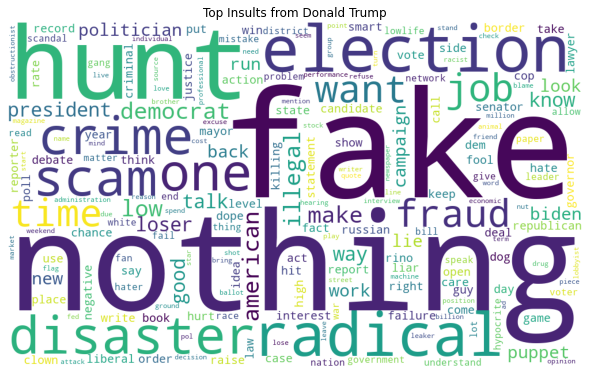

In [18]:
cv = CountVectorizer()
matriz = cv.fit_transform(df.insult)
contaPalavra = pd.DataFrame(cv.get_feature_names(), columns={'Word'})
contaPalavra['Counter'] = matriz.sum(axis=0).tolist()[0]
contaPalavra = contaPalavra.sort_values('Counter', ascending=False).reset_index(drop=True)

myWordCloud(contaPalavra.Word, f'Top Insults from Donald Trump')

In [19]:
df.target = df.target.apply(lambda x: x.lower())
targets = df.target.unique().tolist()
df['tokenTarget'] = df.target.apply(lambda x: targets.index(x))
targetsId = df.tokenTarget.unique().tolist()

In [20]:
topTargets = df[['target', 'tweet']].groupby(['target']).count().sort_values(by='tweet', ascending=False)

line_chart = pygal.Bar()
line_chart.title = 'Target from Trump by year'
line_chart.x_labels = map(str, df.year.unique().tolist())
tbyYear = []
for p in topTargets[:20].index.tolist():
    total = []
    for y in df.year.unique().tolist():
      total.append(df.query(f'year=={y} and tokenTarget == {targets.index(p)}')['year'].count())
    tbyYear.append(total)
y=0
for p in topTargets[:20].index.tolist():  
    line_chart.add(str(p).upper(), tbyYear[y])
    y+=1
    

pygalplot(line_chart)

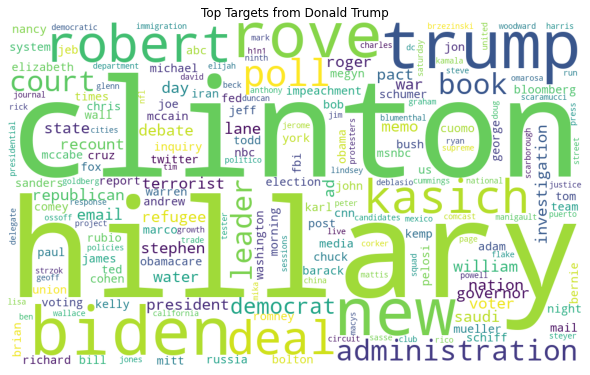

In [21]:
cv = CountVectorizer()
matriz = cv.fit_transform(df.target)
contaPalavra = pd.DataFrame(cv.get_feature_names(), columns={'Word'})
contaPalavra['Counter'] = matriz.sum(axis=0).tolist()[0]
contaPalavra = contaPalavra.sort_values('Counter', ascending=False).reset_index(drop=True)

myWordCloud(contaPalavra.Word, f'Top Targets from Donald Trump')

# **Dataviz - NLP (Sentiment)**

In [22]:
!pip install vaderSentiment -q
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [23]:
readSentiment = SentimentIntensityAnalyzer()
def getSentiment(phrase):
  s = readSentiment.polarity_scores(phrase)
  if s['compound'] <= -0.05:
    sentiment = 0
  elif s['compound'] >= 0.05:
    sentiment = 1
  else:
    sentiment = 2
  return sentiment, s

In [24]:
phrases = ["I love the team and how they played last night 💘" ,
"What a fine day I am having today :-) :-)",
"I am laughing like crazy lol",
"He was not very good at the play",
"To be or not to be",
"He is kinda bored",
]
sentiments = ['Negative', 'Positive', 'Neutral']
for txt in phrases:
  print(sentiments[getSentiment(txt)[0]], ' - ', txt)

Positive  -  I love the team and how they played last night 💘
Positive  -  What a fine day I am having today :-) :-)
Positive  -  I am laughing like crazy lol
Negative  -  He was not very good at the play
Neutral  -  To be or not to be
Negative  -  He is kinda bored


In [25]:
f'Qty rows: {df.shape[0]}'

'Qty rows: 10360'

In [26]:

df['sentimentVader'] = df.tweet.apply(lambda x: sentiments[getSentiment(x)[0]])
df['sentimentVader'].sample(10)

2771    Positive
8626    Positive
5793    Positive
6304    Negative
6835    Negative
8368    Negative
361     Negative
5227    Negative
5810    Negative
5099    Negative
Name: sentimentVader, dtype: object

In [27]:
sentiment = df.groupby('sentimentVader')['sentimentVader'].count()
sentiment

sentimentVader
Negative    7048
Neutral      381
Positive    2931
Name: sentimentVader, dtype: int64

In [28]:
# sentiment
pie_chart = pygal.Pie()
pie_chart.title = 'Insult vs Sentiment (by Vader)'
for p in range(0, len(sentiment)):
    pie_chart.add(sentiment.index[p], sentiment.values[p])
pygalplot(pie_chart)